# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb
For this problem set we do not run the bot, so try to debug your solutions with your own simple tests

## Problem 1 (20 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** 
1. To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 
2. If $\mathrm{vec}(X)$ is a rowwise reshape,
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$


- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$.

- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).

*(2 pts) What is the complexity of a naive computation of  (𝐴⊗𝐵)𝑥 ? Show how it can be reduced.*

Let's look on this formula
$$\mathrm{vec}(AXB)=(A \otimes B^\top) \mathrm{vec}(X).$$
For simplicity let's consider square matrcies of the size $n$.
Then the complexity of execution of the right hand side is $O(n^4)$. If we just use naive algorithm for matrix multiplication and compute left hand side of this equation we'll get $O(n^3)$


*(3 pts) Let matrices  𝐴  and  𝐵  have eigendecompositions  𝐴=𝑆𝐴Λ𝐴𝑆−1𝐴  and  𝐵=𝑆𝐵Λ𝐵𝑆−1𝐵 . Find eigenvectors and eigenvalues of the matrix  𝐴⊗𝐼+𝐼⊗𝐵 .*

To solve this we'll use $(A \otimes B)(C \otimes D)=(AC)\otimes(BD)$

$A \oplus B = S_{A \oplus B} \Lambda_{A \oplus B} S_{A \oplus B}^{-1}$, or $S_{A \oplus B}^{-1} (A \oplus B) S_{A \oplus B} = \Lambda_{A \oplus B}$ 

Let's transform $A \oplus B$ to diag matrix
$$A \oplus B = (S_{A}\Lambda_{A}S_{A}^{-1}) \otimes I + I \otimes (S_{B}\Lambda_{B}S_{B}^{-1})$$

$$A \oplus B = (S_{A}\Lambda_{A}S_{A}^{-1}) \otimes (I\cdot I) + (I \cdot I) \otimes (S_{B}\Lambda_{B}S_{B}^{-1})$$

$$(S_{A}^{-1} \otimes I)(A \oplus B)(I \otimes S_{B}) = (\Lambda_{A} \otimes I)(S_{A}^{-1} \otimes S_{B}) + (S_{A}^{-1} \otimes S_{B})(I \otimes \Lambda_{B})$$

$$(S_{A}^{-1} \otimes S_{B}^{-1})(A \oplus B)(S_{A} \otimes S_{B}) = (I \otimes S_{B}^{-1})(\Lambda_{A} \otimes I)(I \otimes S_{B}) + (S_{A}^{-1} \otimes I)(I \otimes \Lambda_{B})(S_{A} \otimes I)$$

$$(S_{A}^{-1} \otimes S_{B}^{-1})(A \oplus B)(S_{A} \otimes S_{B}) = \Lambda_{A} \otimes I + I \otimes \Lambda_{B}$$

So if $\lambda$ is eigenvalue of $A$ and $\mu$ is eigenvalue of $B$, then $\lambda + \mu$ is eigenvalue of $A \oplus B$ and the corresponding eigenvector is $a_{\lambda} \otimes b_{\mu}$


*(10 pts) Let  𝐴=diag(11000,21000,…9991000,1,1000) . Estimate analytically the number of iterations required to solve linear system with  𝐴  with the relative accuracy  10−4  using
Richardson iteration with the optimal choice of parameter (use  2 -norm)
Chebyshev iteration (use  2 -norm)
Conjugate gradient method (use  𝐴 -norm).*

It seems like *relative accuracy* should be *relative error*. Now this task makes sense.

* From lections... $e_{k+1} \leq q^k e_{0}$, $q = \frac{\lambda_{max} - \lambda_{min}}{\lambda_{max}+\lambda_{min}}$. Taking norm from both sides we get $q^k \leq 10^{-4} \Rightarrow k \geq 4.5 \cdot 10^6$
* For Chebyshev iterations the difference is $q = \frac{\sqrt{cond(A)} - 1}{\sqrt{cond(A)}+1}\ \Rightarrow k \geq 4.5 \cdot 10^3$ where $cond(A) = \frac{\lambda_{max}}{\lambda_{min}}$
* Conjugate gradient method: as A has 1001 different eigenvalues there is the guarantee that method converges in $k \leq 1001$ steps


## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.
 
* (5 pts) Implement the spectral partitioning as the function ```partition```:

*(5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of  𝐿 , corresponding to the eigenvalue  0  and prove (analytically) that it is indeed an orthoprojection.*

We know that eigenvector corresponding to zero is $\mathbf{e}$ vector. So We just need to write the projection on the vector
$$proj(\mathbf{y},\mathbf{e})=\frac{\mathbf{e}\mathbf{e}^{T}}{\mathbf{e}^{T}\mathbf{e}}\mathbf{y}$$
then, the vector from desired subspace (orthogonal to $\mathbf{e}$) is
$$\mathbf{y}-proj(\mathbf{y},\mathbf{e})$$
On the top of the fraction we have matrix filled with ones. So it's easy to see that it transforms to
$$\mathbf{y}-\frac{(\sum_{j} y_{j}, \dotso ,\sum_{j} y_{j})^{T}}{n}$$

$$\langle \mathbf{y}-proj(\mathbf{y},\mathbf{e}), \mathbf{e} \rangle = 0$$

Hence, the desired projector is
$$I-\frac{\mathbf{e}\mathbf{e}^{T}}{\mathbf{e}^{T}\mathbf{e}}$$

In [102]:
import scipy.sparse as sp
import scipy.sparse.linalg as lin
import numpy as np

# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    assert isinstance(A, sp.csr_matrix), "A must be sp.csr_matrix type"
    x = x0
    eigs = np.array([0])
    
    L =  sp.diags([np.sum(row) for row in A]) - A
    solver = lin.splu(sp.csc.csc_matrix(L - shift * sp.csc.csc_matrix(np.eye(A.shape[0]))))
    
    iterations_done = 0
    for i in range(num_iter_fix):
        x = solver.solve(x - np.sum(x) / A.shape[0]) / np.linalg.norm(x)
        newval = (L.dot(x)).dot(x) / np.dot(x, x)
        eigs = np.append(eigs, newval)
        iterations_done = i + 1
        if (np.linalg.norm(eigs[-1] - eigs[-2]) / np.linalg.norm(eigs[-1])) <= eps:  # np.linalg.norm because of possible complex values
            print("fixed shift ok")
            print("Iterations performed {}".format(i+1))
            return x, eigs
    
    for i in range(num_iter_adapt):
        solver = lin.splu(sp.csc.csc_matrix(L - eigs[-1] * sp.csc.csc_matrix(np.eye(A.shape[0])))) 
        x = solver.solve(x - np.sum(x) / A.shape[0]) / np.linalg.norm(x)
        newval = (L.dot(x)).dot(x) / np.dot(x, x)
        eigs = np.append(eigs, newval)
                                          
        if (np.linalg.norm(eigs[-1] - eigs[-2]) / np.linalg.norm(eigs[-1])) <= eps:
            print("adapted shift ok")
            print("Iterations performed {}".format(i + 1 + iterations_done))
            return x, eigs   
    
    return x, eigs

In [48]:
partition(sp.csr_matrix([[0,1],[1,0]]), 0.01, 10, 10, np.random.randn(2), 10e-5)

fixed shift ok


(array([ 0.35533004, -0.35533004]), array([0., 2., 2.]))

Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

In [52]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

fixed shift ok
Iterations performed 3


/home/dmitriy/MyEnv/other/skoltech/nla/env/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


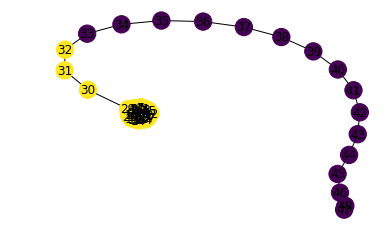

In [117]:
G = nx.lollipop_graph(30, 19)
eigvec, eigs = partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 10, 10, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)
pos=nx.spring_layout(G)

nx.draw_networkx(G, pos, node_color=np.sign(eigvec))
plt.axis('off')
plt.show()

adapted shift ok
Iterations performed 3


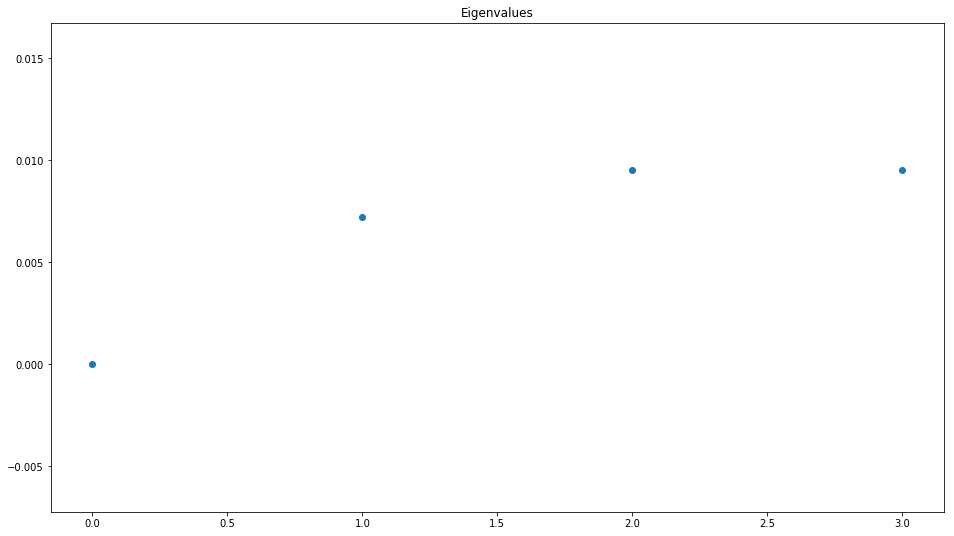

In [118]:
eigvec, eigs = partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 0, 100, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)
plt.figure(figsize=(16, 9))
plt.scatter([i for i in range(len(eigs))], eigs)
plt.title('Eigenvalues')
plt.show()

In [107]:
np.dot(nx.adj_matrix(G).todense(), eigvec) - eigs[-1]*eigvec 

matrix([[ 1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  1.10404607e+10,
          1.10404607e+10,  1.10404607e+10,  8.52111315e+09,
         -3.94141598e+09, -7.31116562e+09, -8.82122551e+09,
         -8.08749235e+09, -5.29660068e+09, -1.15844998e+09,
          3.27436750e+09,  6.87430716e+09,  8.72567769e+09,
          8.35755899e+09,  5.86358683e+09,  1.87813536e+09,
         -2.58504419e+09, -6.39068424e+09, -2.82349008e+09]])

In [108]:
eigs

array([0.        , 0.24465527, 0.25423314, 0.25436296, 0.25436296])

We have bad initial initial approximation, so adaptive method doesn't converge to the correct eigenvector

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.
* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

*(5 pts) Prove that multiplicity of the eigenvalue  0  in the spectrum of the graphs Laplacian is the number of its connected components.*

1. $\lambda_0 = 0$
From lections we know that $L = D - A$ have sums in rows equal to 0, so $\mathbf{e}$ is eigenvector and $\lambda_0$ equals to 0

2. ...



In [115]:
G = nx.cycle_graph(30)
print("Connectivity {}".format(partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 100, 100, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)[1][-1]))
G = nx.complete_graph(30)
print("Connectrivity {}".format(partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 100, 100, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)[1][-1]))

fixed shift ok
Iterations performed 4
Connectivity 0.0437048961372861
fixed shift ok
Iterations performed 2
Connectrivity 30.00000000000001


In [133]:
edges = [30*29/2, 350, 300, 250, 200, 150, 100, 50, 10]
connectivities = []
for m in edges:
    G = nx.gnm_random_graph(30,m)
    connectivities.append(partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 100, 100, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)[1][-1])

fixed shift ok
Iterations performed 2
fixed shift ok
Iterations performed 24
fixed shift ok
Iterations performed 27
fixed shift ok
Iterations performed 36
fixed shift ok
Iterations performed 11
fixed shift ok
Iterations performed 16
fixed shift ok
Iterations performed 9
fixed shift ok
Iterations performed 13
fixed shift ok
Iterations performed 19


Text(0, 0.5, 'Connectivity')

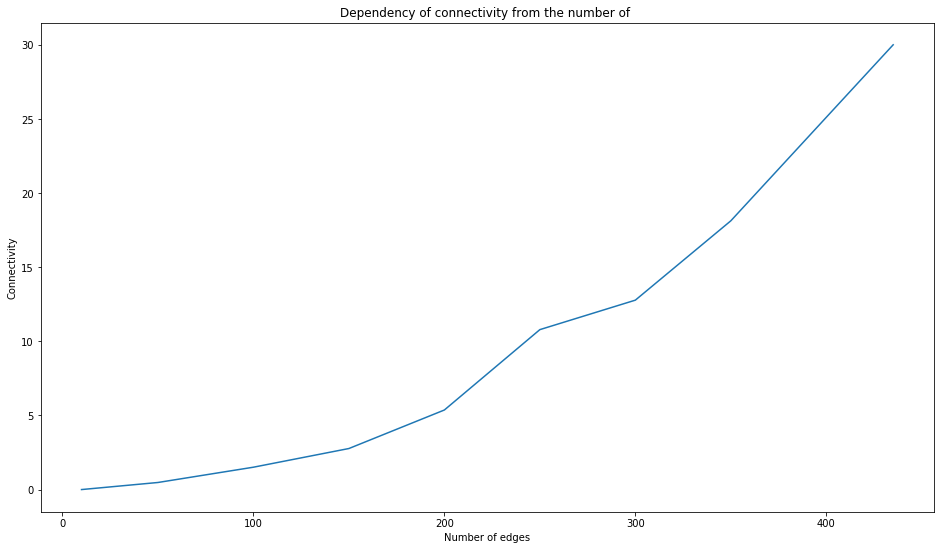

In [135]:
plt.figure(figsize=(16,9))
plt.plot(edges, connectivities)
plt.title("Dependency of connectivity from the number of ")
plt.xlabel("Number of edges")
plt.ylabel("Connectivity")

fixed shift ok
Iterations performed 5


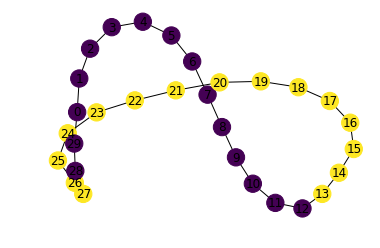

In [137]:
G = nx.cycle_graph(30)
eigvec, eigs = partition(sp.csr_matrix(nx.adj_matrix(G)), 0.01, 100, 100, np.random.randn(nx.adj_matrix(G).shape[0]), 10e-5)
pos=nx.spring_layout(G)

nx.draw_networkx(G, pos, node_color=np.sign(eigvec))
plt.axis('off')
plt.show()

So we can see that the second-smallest eigenvalue is really correlates with connectivity

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

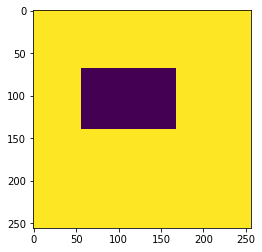

In [180]:
# Your solution is here
from PIL import Image
img = Image.open('wb.png')
npimg = np.array(img)
binarized = (npimg < 3)[:,:,0]
plt.imshow(binarized)

In [201]:
binarized

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [200]:
(binarized[biFalse).shape

(256, 256)

In [202]:
def get_adjacency(binarized):
    n = len(binarized[binarized == False])
    adj = np.zeros((n,n))
    adj = sp.csr_matrix(adj)
    x = 0
    y = 0
    imin = binarized.shape[0]
    jmin = binarized.shape[0]
    imax = 0
    jmax = 0
    for i in range(binarized.shape[0]):
        for j in range(binarized.shape[1]):
            if not binarized[i,j]:
                if i < imin:
                    imin = i
                if j < jmin:
                    jmin = j
                if i > imax:
                    imax = i
                if j > jmax:
                    jmax = j
                    
    print("imin {}".format(imin))
    print("jmin {}".format(jmin))
    print("imax {}".format(imax))
    print("jmax {}".format(jmax))

    for i in range(binarized.shape[0]):
        for j in range(binarized.shape[1]):
            if not binarized[i,j]:
                if j + 1 <= jmax:
                    adj[i - imin, j - jmin + 1] = 1
                if i + 1 <= imax:
                    adj[i - imin + 1, j - jmin] = 1
                if (i + 1 <= imax) and (j + 1 <= jmax):
                    adj[i - imin + 1, j - jmin + 1] = 1
                if (i - 1 >= imin ) and (j + 1 <= jmax):
                    adj[i - imin - 1, j - jmin + 1] = 1
                if (i - 1 >= imin):
                    adj[i - imin - 1, j - jmin] = 1
                if (i - 1 >= imin) and (j -1 >= jmin):
                    adj[i - imin - 1, j - jmin - 1] = 1
                if (j - 1 >= jmin):
                    adj[i - imin, j - jmin - 1] = 1
                if (i + 1 <= imax) and (j - 1 >= jmin):
                    adj[i - imin + 1, j - jmin - 1] = 1
    return adj

In [203]:
G = get_adjacency(binarized)

imin 68
jmin 56
imax 139
jmax 167


/home/dmitriy/MyEnv/other/skoltech/nla/env/lib/python3.5/site-packages/scipy/sparse/compressed.py:746: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [205]:
eigvec, eigs = partition(G, 0.01, 100, 100, np.random.randn(G.shape[0]), 10e-5)

fixed shift ok
Iterations performed 14


In [206]:
eigs

array([ 0.00000000e+00,  3.90375338e-07, -9.37417189e-11,  2.34406215e-14,
       -6.05215472e-18,  7.67778663e-19,  5.06133421e-19,  2.40198911e-19,
        2.27331113e-19,  3.64587633e-19,  4.20348095e-19,  3.90323231e-19,
        3.43141302e-19,  3.17405704e-19,  3.17405704e-19])

In [209]:
np.sign(eigvec)

array([-1., -1., -1., ..., -1.,  1., -1.])

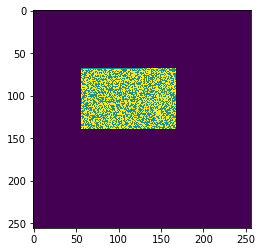

In [214]:
current = 0
new_img = np.zeros(binarized.shape)
signs = np.sign(eigvec)
for i in range(binarized.shape[0]):
    for j in range(binarized.shape[1]):
        if not binarized[i,j]:
            if signs[current] > 0:
                new_img[i,j] = 100
            else:
                new_img[i,j] = 50
            current += 1
    
plt.imshow(new_img)            

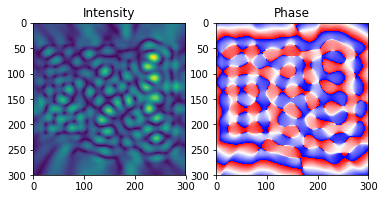

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import hankel2
radiointel = np.load('radiointel.npy')
plt.subplot(1,2,1)
plt.imshow( np.abs(radiointel) )
plt.title('Intensity')
plt.subplot(1,2,2)
plt.imshow( np.angle(radiointel), cmap='bwr' )
plt.title('Phase')
plt.show()

In this problem you asked to use using FFT-matvec and make the convolution operator for the picture of the size $N\times N$, where $N=300$ with the following kernel (2D Helmholtz scattering):
$$
   G_{\overline{i_1 j_1}, \overline{i_2 j_2} } = \frac{-1j}{4} H^{(2)}_0 \left( k_0 \cdot \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } \right), \quad i_1,j_1, i_2, j_2 = 0,\dots, N-1 $$

except when both $i_1=i_2$ and $j_1 = j_2$. 

In that case set $$G_{i_1=i_2, j_1=j_2} = 0$$.

Here
$1j$ is the imaginary unit, $H^{(2)}_0(x)$ - (complex-valued) Hankel function of the second kind of the order 0. See 'scipy.special.hankel2'.

$$ \Delta r_{\overline{  i_1 j_1  } , \overline{ i_2 j_2}  } = h \sqrt{  (i_1-i_2)^2 + (j_1-j_2)^2  } $$
$$ h = \frac{1}{N-1}$$
$$k_0 = 50.0$$



See https://github.com/oseledets/nla2018/blob/master/lectures/lecture-15.ipynb for the recipe.

For the kernel array, there is a following element correspondence with BTTB matrix G:

$$eG_{i_1-i_2, j_1 - j_2} \equiv np.roll(np.roll( G_{\overline{i_1 j_1}, \overline{i_2 j_2} }    ,-N, axis=1),-N, axis=0)$$


### Tasks:

1. Create the complex-valued kernel $eG$ ($2N-1 \times 2N-1$)-sized matrix according with the instructions above. Note that at the point where $\Delta r=0$ value of $eG$ should be manually zet to zero. Store in the variable eG. Plot the eG.real of it with plt.imshow

2. Write function `Gx` that calculates matvec of $G$ by a given vector $x$. Make sure all calculations and arrays are in dtype=np.complex64. 

Hint 1: matvec with a discrete delta function (vector of all zeros with one lone 1.0 somewhere) should return a kernel function centered on the location of the delta function. If this doesn't happen, something is wrong.

Hint 2: As shown in the lecture slides, kernel eG should be cyclically shifted on both dimensions (np.roll), such that the center of the Green's function is located at eG[0,0] to work properly inside fft2 function.

3. What is the complexity of one matvec? 
4. Use `scipy.sparse.linalg.LinearOperator`  to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.
5. Write a function that takes an appropriate Krylov method(s) and solves linear system $Gx=b$ to deconvolve `radiointel`. The result should be binary mask array (real, integer, of 0s and 1s) of the plane of the building. Make sure it converged sufficiently and you did the post-processing properly. Plot the result as an image. 
    
    
**Note:** You can use standart fft and ifft from e.q. `numpy.fft`


### 1. Kernel (5 pts)

In [ ]:
k0 = #
N = #

def make_eG(k0, N):
    # INPUT:  
    # k0 #dtype = float
    # N #dtype = int
    
    # OUTPUT:
    # np.array, shape = (2N-1, 2N-1), dtype = np.complex64
    return eG

eG = make_eG(k0=k0, N=N)

plt.imshow(eG.real)

### 2. Matvec (5 pts)

In [ ]:
def Gx(x, eG):
    # input:  
    # x, np.array, shape=(N**2, ), dtype = np.complex64
    # eG, np.array, shape=(2N-1, 2N-1), dtype = np.complex64
    # output:
    # matvec, np.array, shape = (N**2, ), dtype = np.complex64

    return matvec

### 3. Complexity (3 pts)

Big-O complexity of one matvec operation is ... It can be shown...

### 4. LinearOperator (2 pts)

In [ ]:
L_Gx = 

### 5. Reconstruction (15pts)

In [ ]:
def normalize(mask): #proper normalization to binary mask
    mask = np.clip(mask, a_min=0, a_max=1)
    mask = np.round(mask)
    mask = np.asarray(mask, dtype=int)
    return mask

errs=[]
def callback(err): #callback function to store the history of convergence
    global l
    errs.append(err)
    return 

mask = #some_solver(, , , callback = callback)

plt.figure()
plt.imshow( mask.real , cmap='binary')
plt.title('Deconvolution after recovery')
plt.colorbar()

plt.figure()
plt.imshow( normalize(  mask.real ) , cmap='binary')
plt.title('Restored building plan')
plt.colorbar()

plt.figure()
plt.semilogy(errs)
plt.title('Convergence')